In [1]:
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
import numpy as np
import pandas as pd
from coffea.util import load
import hist
import os
from pprint import pprint 
hep.style.use(hep.style.ROOT)
import vector
vector.register_awkward()
import hist
import numba

In [113]:
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/TTbar_MC_Run3_v2/"
os.makedirs(output_folder, exist_ok=True)

In [119]:
df = [
{
"name": "default_run_32",
"legend" : "Baseline",
"nweights": 387966,
"npad_cls": 60,
"npad_rec": 60,
"t32":  346.311, #ms
"cmssw": 5.23,
"rank": 45,
},
{
"name": "default_run_32",
"legend" : "Baseline",
"nweights": 387966,
"npad_cls": 15,
"npad_rec": 20,
"t32":   26.211,#ms
"cmssw": 0.53,
"rank": 220 ,
},
{
"name": "simpler_rechit_run_20",
"legend" : "Simpler rechits layer",
"nweights": 168860,
"npad_cls": 60,
"npad_rec": 60,
"t32":   65.344,  #ms
"cmssw": 1.59,
"rank": 87,
},
{
"name": "simpler_rechit_run_20",
"legend" : "Simpler rechits layer",
"nweights": 168860,
"npad_cls": 15,
"npad_rec": 20,
"t32": 10.739,  #ms
"cmssw": 0.21 ,
"rank": 388,
},
{
"name": "norechits_run_20",
"legend" : "Without rechits layer",
"nweights": 371616,
"npad_cls": 60,
"npad_rec": 60,
"t32":  27.660,  #ms
"cmssw": 0.33 ,
"rank": 208,
},
{
"name": "norechits_run_20",
"legend" : "Without rechits layer",
"nweights": 371616,
"npad_cls": 15,
"npad_rec": 20,
"t32": 7.489, #ms
"cmssw": 0.11,
"rank": 604,
},
{
"name": "norechits_run_30",
"legend" : "Without rechits layer\n(small)",
"nweights": 164640,
"npad_cls": 60,
"npad_rec": 60,
"t32":  20.532,  #ms
"cmssw":  0.25,
"rank": 339,
},
{
"name": "norechits_run_30",
"legend" : "Without rechits layer\n(small)",
"nweights": 164640,
"npad_cls": 15,
"npad_rec": 20,
"t32":  7.497 , #ms
"cmssw": 0.09,
"rank": 706,
}

]

df = pd.DataFrame(df)
df.to_csv(f"{output_folder}/metadata_timing_models.csv", index=False, sep=";")

In [35]:
df

,name,legend,nweights,npad_cls,npad_rec,t32,cmssw,rank
0,default_run_32,Baseline,387966,60,60,346.311,0.00,0
1,default_run_32,Baseline,387966,15,20,26.211,0.53,220
2,simpler_rechit_run_20,Simpler rechits layer,168860,60,60,65.344,0.00,0
3,simpler_rechit_run_20,Simpler rechits layer,168860,15,20,10.739,0.21,388
4,norechits_run_20,Without rechits layer,371616,60,60,27.660,0.33,208
5,norechits_run_20,Without rechits layer,371616,15,20,7.489,0.11,604
6,norechits_run_30,Without rechits layer (small),164640,60,60,20.532,0.25,339
7,norechits_run_30,Without rechits layer (small),164640,15,20,7.497,0.09,706


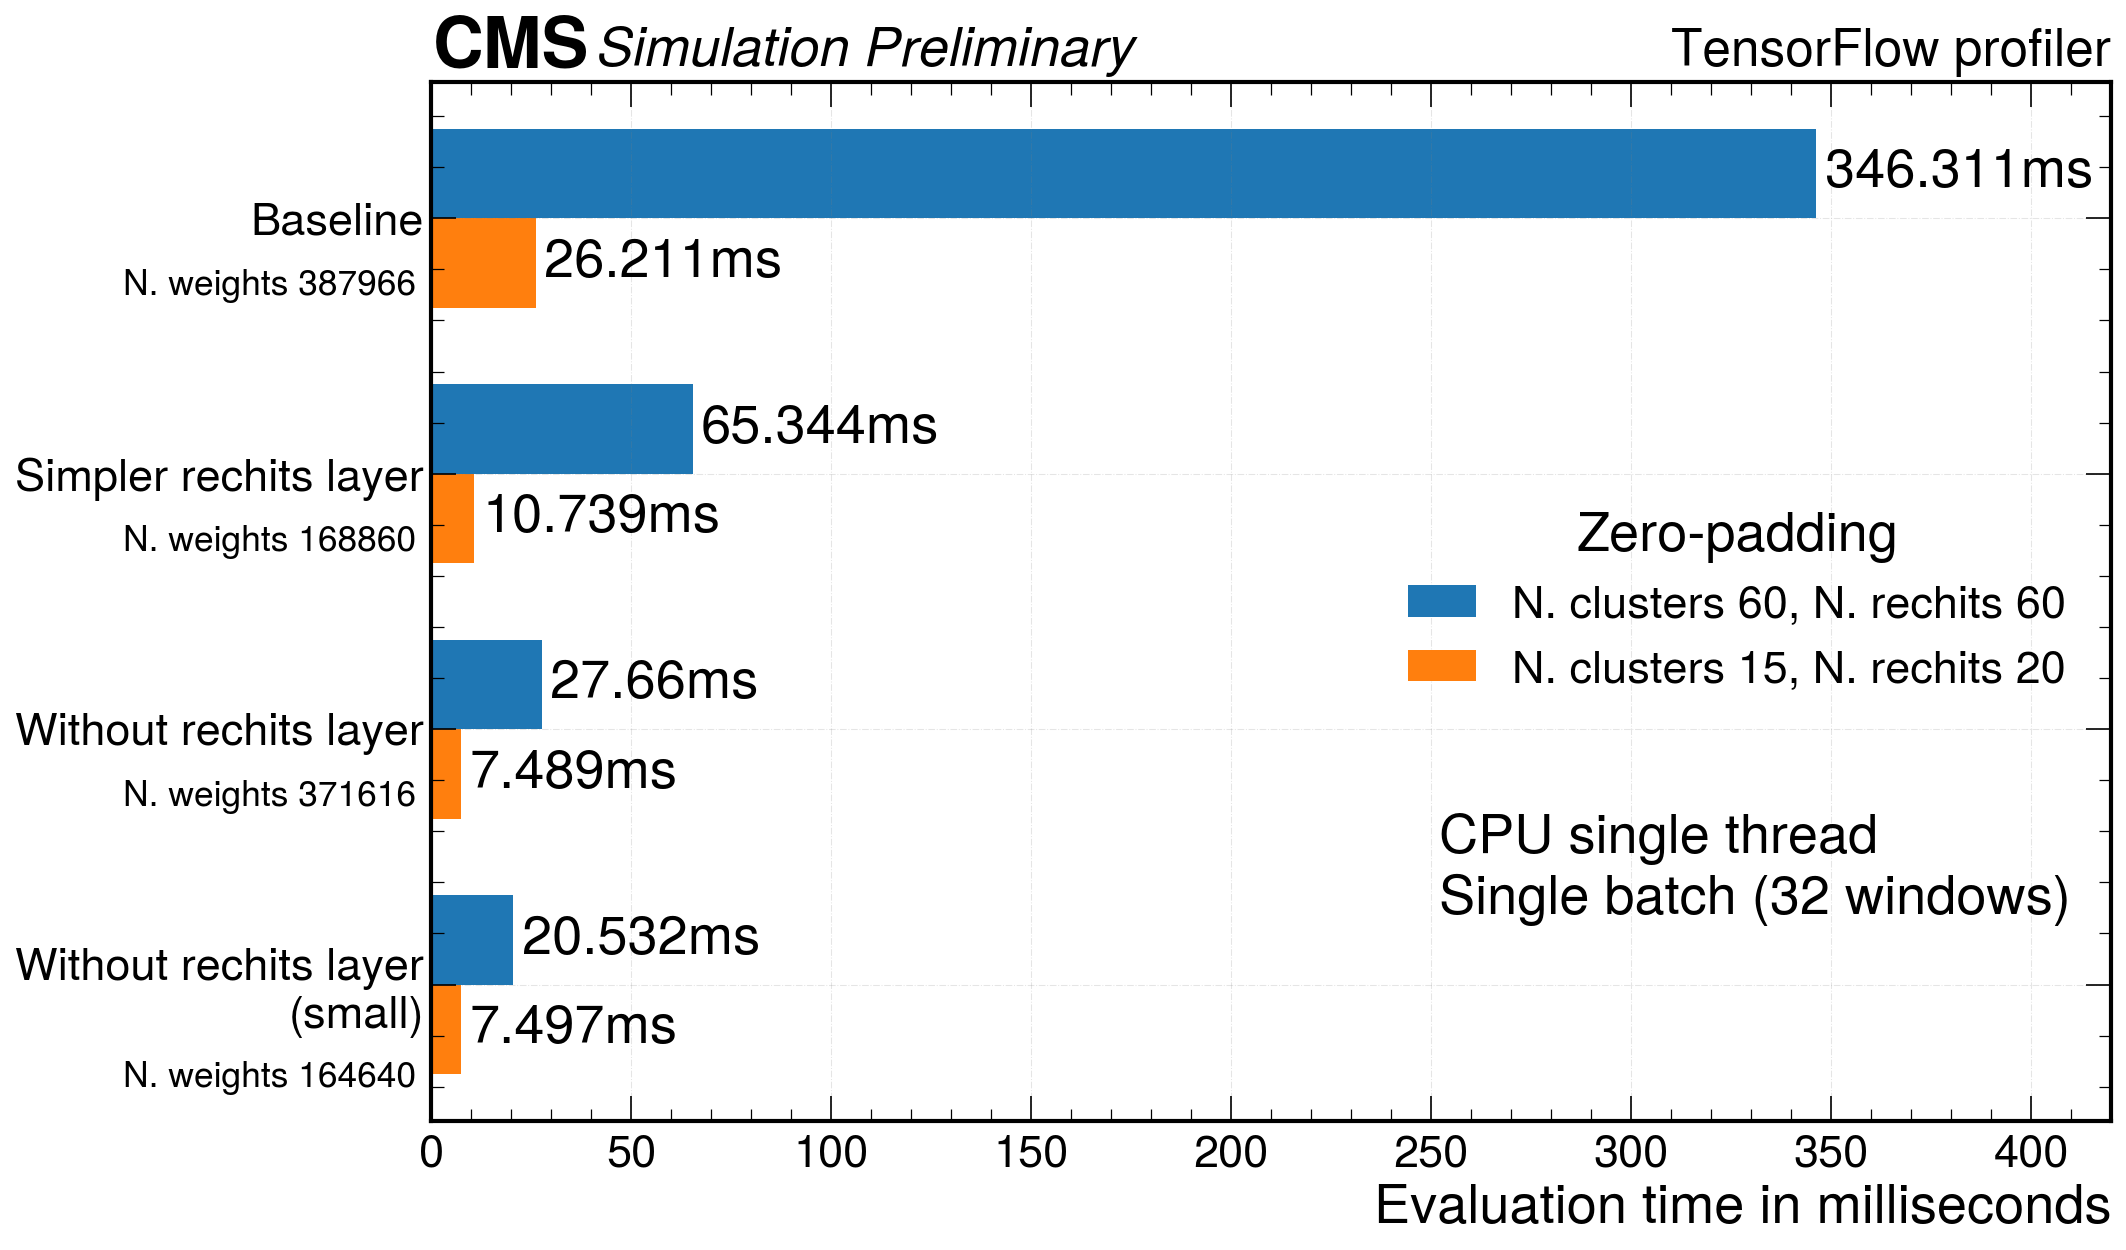

In [127]:
A = df[df.npad_cls==60].t32
B = df[df.npad_cls==15].t32

df_60 = df[df.npad_cls==60]
df_15 = df[df.npad_cls==15]
labels = [f"{df_60.iloc[i].legend}" for i in range(4)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize =(16, 9), dpi=150)
rects1 = ax.barh(x - width/2, A, width, label='N. clusters 60, N. rechits 60')
rects2 = ax.barh(x + width/2, B, width, label='N. clusters 15, N. rechits 20')

ax.set_yticks(x)

lw = [f"{df_30.iloc[i].nweights}" for i in range(4)]

for i in range(4):
    if i<3:
        ax.text(-77, x[i]+0.3, f"N. weights {lw[i]}", fontsize=17 )
    else:
        ax.text(-77, x[i]+0.4, f"N. weights {lw[i]}", fontsize=17 )

#ax.set_yticklabels(labels)
ax.set_xlim(0, 420.)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticklabels(labels)
leg = ax.legend(title="Zero-padding", loc="center right")
ax.bar_label(rects1, labels= [f"{df_60.iloc[i].t32}ms" for i in range(len(labels))], padding=4)
ax.bar_label(rects2 , labels=[f"{df_15.iloc[i].t32}ms" for i in range(len(labels))], padding=4)

ax.grid(visible = True, color ='grey',
         linestyle ='-.', linewidth = 0.5,
         alpha = 0.2)

ax.invert_yaxis()
ax.set_xlabel("Evaluation time in milliseconds")
ax.text(0.60, 0.2, "CPU single thread\nSingle batch (32 windows)", transform=ax.transAxes)
leg.get_frame().set_edgecolor('b')

hep.cms.label(llabel="Simulation Preliminary", rlabel="TensorFlow profiler", loc=0, ax=ax)

plt.subplots_adjust(left=0.2)

if output_folder!=None:
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/tf_profiler_timing.png")
    fig.savefig(output_folder + f"/tf_profiler_timing.pdf")
    fig.savefig(output_folder + f"/tf_profiler_timing.svg")
    

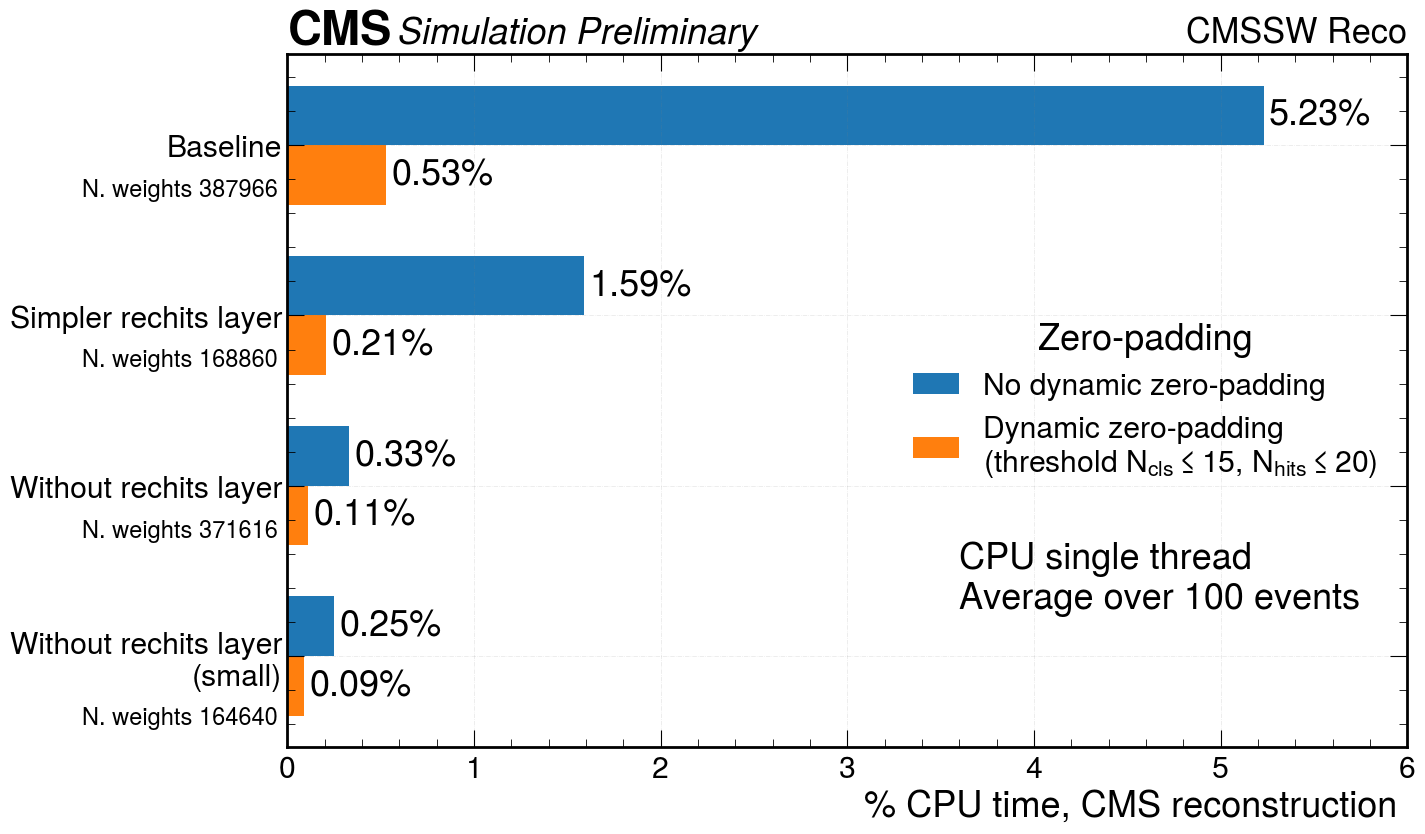

In [123]:
A = df[df.npad_cls==60].cmssw
B = df[df.npad_cls==15].cmssw

df_60 = df[df.npad_cls==60]
df_15 = df[df.npad_cls==15]
labels = [f"{df_60.iloc[i].legend}" for i in range(4)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize =(16, 9), dpi=100)
rects1 = ax.barh(x - width/2, A, width, label='No dynamic zero-padding')
rects2 = ax.barh(x + width/2, B, width, label='Dynamic zero-padding\n(threshold $N_{cls}\leq15$, $N_{hits} \leq20$)')

ax.set_yticks(x)

lw = [f"{df_30.iloc[i].nweights}" for i in range(4)]

for i in range(4):
    if i<3:
        ax.text(-1.1, x[i]+0.3, f"N. weights {lw[i]}", fontsize=17 )
    else:
        ax.text(-1.1, x[i]+0.4, f"N. weights {lw[i]}", fontsize=17 )
#ax.set_yticklabels(labels)
ax.set_xlim(0, 6)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticklabels(labels)
leg = ax.legend(title="Zero-padding", loc="center right")
ax.bar_label(rects1, labels= [f"{df_60.iloc[i].cmssw}%" for i in range(len(labels))], padding=4)
ax.bar_label(rects2 , labels=[f"{df_15.iloc[i].cmssw}%" for i in range(len(labels))], padding=4)

ax.grid(visible = True, color ='grey',
         linestyle ='-.', linewidth = 0.5,
         alpha = 0.2)

ax.invert_yaxis()
ax.set_xlabel("% CPU time, CMS reconstruction ")
ax.text(0.60, 0.2, "CPU single thread\nAverage over 100 events", transform=ax.transAxes)
leg.get_frame().set_edgecolor('b')

hep.cms.label(llabel="Simulation Preliminary", rlabel="CMSSW Reco", loc=0, ax=ax)

plt.subplots_adjust(left=0.2)

if output_folder!=None:
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/cmssw_timing.png")
    fig.savefig(output_folder + f"/cmssw_timing.pdf")
    fig.savefig(output_folder + f"/cmssw_timing.svg")
    